# ДЗ 4. Сверточные нейронные сети

- обучить рукописную сверточную нейронную сеть (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на датасете cifar-10  
- оценить рост точности при увеличении ширины сети (больше фильтров)  
- оценить рост точности при увеличении глубины сети (больше слоев)  
- сравнить с точностью полносвязной сети для этой выборки  

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [58]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3090415267864137026]

**Загрузим данные и разобьем их на трейн и тест**

In [3]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

# разделение тренировочной и тестовой выборки
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train / 255.0
X_test = X_test / 255.0

170500096/170498071 [==============================] - 116s 1us/step
X_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


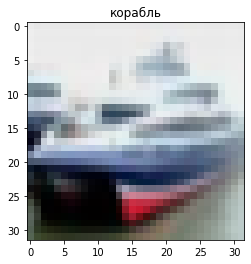

In [6]:
N = 1

plt.imshow(X_test[N])
plt.title(classes[np.argmax(y_test[N,:])])
plt.show()

In [24]:
# установка параметров нейросети
result = pd.DataFrame(columns=['Model', 'Train', 'Test', 'Test loss', 'Test accuracy'])
batch_size = 512
epochs = 10

In [12]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

In [13]:
# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [14]:
# обучение модели
model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)

Epoch 1/10
98/98 [==============================] - 63s 643ms/step - loss: 2.3000 - accuracy: 0.1165 - val_loss: 2.2869 - val_accuracy: 0.1377
Epoch 2/10
98/98 [==============================] - 64s 651ms/step - loss: 2.2806 - accuracy: 0.1429 - val_loss: 2.2506 - val_accuracy: 0.1622
Epoch 3/10
98/98 [==============================] - 63s 645ms/step - loss: 2.2281 - accuracy: 0.1967 - val_loss: 2.1107 - val_accuracy: 0.2645
Epoch 4/10
98/98 [==============================] - 64s 649ms/step - loss: 2.0861 - accuracy: 0.2627 - val_loss: 1.9973 - val_accuracy: 0.2952
Epoch 5/10
98/98 [==============================] - 64s 649ms/step - loss: 2.0136 - accuracy: 0.2832 - val_loss: 1.9600 - val_accuracy: 0.2979
Epoch 6/10
98/98 [==============================] - 62s 638ms/step - loss: 1.9700 - accuracy: 0.2976 - val_loss: 1.9179 - val_accuracy: 0.3238
Epoch 7/10
98/98 [==============================] - 62s 637ms/step - loss: 1.9142 - accuracy: 0.3182 - val_loss: 1.8872 - val_accuracy: 0.3298

In [15]:
# метрики
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=2)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_accuracy}')
print(f'test_loss: {test_loss}, test_accuracy: {test_accuracy}')

1563/1563 - 8s - loss: 1.7229 - accuracy: 0.3935
313/313 - 2s - loss: 1.7273 - accuracy: 0.3886
train_loss: 1.7228589057922363, train_accuracy: 0.3934600055217743
test_loss: 1.7272597551345825, test_accuracy: 0.3885999917984009


In [25]:
# добавим в таблицу сравнения
y_p = model.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )

new_row = {'Model':'CNN базовая', 'Train':classes[y_t[0]], 'Test': classes[y_i[0]], \
           'Test loss':round(test_loss, 3), 'Test accuracy':round(test_accuracy, 3)}

result = result.append(new_row, ignore_index=True)

In [26]:
result

,Model,Train,Test,Test loss,Test accuracy
0,CNN базовая,корабль,корабль,1.727,0.389


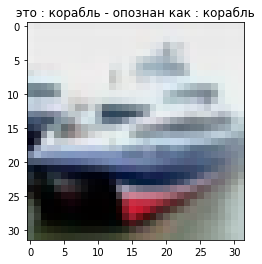

In [40]:
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

**Оценить рост точности при увеличении ширины сети (больше фильтров)**

In [27]:
# конфигурирование слоев нейросети
model1 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model1.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]))
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

# полносвязные слои нейронной сети
model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 128)       36992     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 128)       147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)             

In [29]:
# компиляция модели
model1.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [30]:
# обучение модели
model1.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)

Epoch 1/10
98/98 [==============================] - 86s 871ms/step - loss: 2.2997 - accuracy: 0.1269 - val_loss: 2.2875 - val_accuracy: 0.1565
Epoch 2/10
98/98 [==============================] - 86s 881ms/step - loss: 2.2819 - accuracy: 0.1689 - val_loss: 2.2522 - val_accuracy: 0.1759
Epoch 3/10
98/98 [==============================] - 86s 878ms/step - loss: 2.2292 - accuracy: 0.1979 - val_loss: 2.1275 - val_accuracy: 0.2130
Epoch 4/10
98/98 [==============================] - 85s 866ms/step - loss: 2.1052 - accuracy: 0.2432 - val_loss: 2.1199 - val_accuracy: 0.2331
Epoch 5/10
98/98 [==============================] - 85s 869ms/step - loss: 2.0369 - accuracy: 0.2677 - val_loss: 2.0188 - val_accuracy: 0.2813
Epoch 6/10
98/98 [==============================] - 88s 899ms/step - loss: 1.9845 - accuracy: 0.2940 - val_loss: 1.9581 - val_accuracy: 0.3032
Epoch 7/10
98/98 [==============================] - 85s 870ms/step - loss: 1.9175 - accuracy: 0.3188 - val_loss: 1.9143 - val_accuracy: 0.3261

In [34]:
# метрики
train_loss, train_accuracy = model1.evaluate(X_train, y_train, verbose=2)
test_loss, test_accuracy = model1.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_accuracy}')
print(f'test_loss: {test_loss}, test_accuracy: {test_accuracy}')

1563/1563 - 12s - loss: 1.8238 - accuracy: 0.3631
313/313 - 2s - loss: 1.8315 - accuracy: 0.3614
train_loss: 1.823795199394226, train_accuracy: 0.3631199896335602
test_loss: 1.8314781188964844, test_accuracy: 0.3614000082015991


In [66]:
# result = result.drop(index=[1])

In [46]:
# добавим в таблицу сравнения
y_p = model1.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )

new_row = {'Model':'CNN c увеличением каналов', 'Train':classes[y_t[0]], 'Test': classes[y_i[0]], \
           'Test loss':round(test_loss, 3), 'Test accuracy':round(test_accuracy, 3)}

result = result.append(new_row, ignore_index=True)

In [47]:
result

,Model,Train,Test,Test loss,Test accuracy
0,CNN базовая,корабль,корабль,1.727,0.389
1,CNN c увеличением каналов,корабль,корабль,1.831,0.361


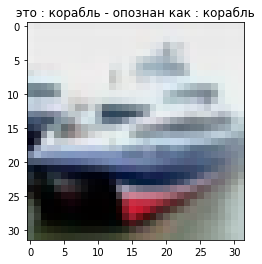

In [48]:
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

**Оценить рост точности при увеличении глубины сети (больше слоев)**

In [41]:
# конфигурирование слоев нейросети
model2 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# полносвязные слои нейронной сети
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 6, 6, 128)        

In [43]:
# компиляция модели
model2.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [44]:
# обучение модели
model2.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)

Epoch 1/10
98/98 [==============================] - 67s 684ms/step - loss: 2.3014 - accuracy: 0.1039 - val_loss: 2.2984 - val_accuracy: 0.1131
Epoch 2/10
98/98 [==============================] - 68s 688ms/step - loss: 2.2971 - accuracy: 0.1433 - val_loss: 2.2922 - val_accuracy: 0.1824
Epoch 3/10
98/98 [==============================] - 67s 683ms/step - loss: 2.2897 - accuracy: 0.1810 - val_loss: 2.2775 - val_accuracy: 0.1794
Epoch 4/10
98/98 [==============================] - 69s 703ms/step - loss: 2.2693 - accuracy: 0.1813 - val_loss: 2.2225 - val_accuracy: 0.2010
Epoch 5/10
98/98 [==============================] - 69s 700ms/step - loss: 2.1976 - accuracy: 0.2086 - val_loss: 2.0870 - val_accuracy: 0.2443
Epoch 6/10
98/98 [==============================] - 68s 691ms/step - loss: 2.1162 - accuracy: 0.2240 - val_loss: 2.0411 - val_accuracy: 0.2383
Epoch 7/10
98/98 [==============================] - 68s 698ms/step - loss: 2.0646 - accuracy: 0.2406 - val_loss: 2.0720 - val_accuracy: 0.2337

In [49]:
# метрики
train_loss, train_accuracy = model2.evaluate(X_train, y_train, verbose=2)
test_loss, test_accuracy = model2.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_accuracy}')
print(f'test_loss: {test_loss}, test_accuracy: {test_accuracy}')

1563/1563 - 9s - loss: 1.9965 - accuracy: 0.2736
313/313 - 2s - loss: 1.9867 - accuracy: 0.2799
train_loss: 1.996517300605774, train_accuracy: 0.27362000942230225
test_loss: 1.9867222309112549, test_accuracy: 0.2799000144004822


In [50]:
# добавим в таблицу сравнения
y_p = model2.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )

new_row = {'Model':'CNN c увеличением слоев', 'Train':classes[y_t[0]], 'Test': classes[y_i[0]], \
           'Test loss':round(test_loss, 3), 'Test accuracy':round(test_accuracy, 3)}

result = result.append(new_row, ignore_index=True)

In [51]:
result

,Model,Train,Test,Test loss,Test accuracy
0,CNN базовая,корабль,корабль,1.727,0.389
1,CNN c увеличением каналов,корабль,корабль,1.831,0.361
2,CNN c увеличением слоев,корабль,автомобиль,1.987,0.280


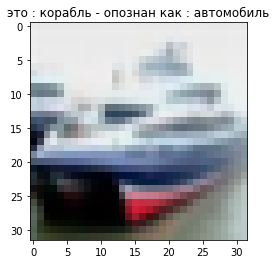

In [52]:
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

**Сравнить с точностью полносвязной сети для этой выборки**

In [59]:
# полносвязная сеть
inputs = Input(shape=(32, 32, 3))
x = Flatten()(inputs)
x_1 = Dense(512, activation='relu')(x)
x_2 = Dense(256, activation='relu')(x_1)
x_3 = Dense(128, activation='relu')(x_2)
x_4 = Dense(32, activation='relu')(x_3)
outputs = Dense(10)(x_4)
    
model3 = Model(inputs, outputs)
model3.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                330   

In [61]:
# компиляция модели
model3.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [62]:
# обучение модели
model3.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)

Epoch 1/10
98/98 [==============================] - 2s 15ms/step - loss: 8.0076 - accuracy: 0.0992 - val_loss: 8.1606 - val_accuracy: 0.1000
Epoch 2/10
98/98 [==============================] - 1s 14ms/step - loss: 8.1024 - accuracy: 0.1018 - val_loss: 8.1510 - val_accuracy: 0.1000
Epoch 3/10
98/98 [==============================] - 1s 14ms/step - loss: 8.1050 - accuracy: 0.0993 - val_loss: 8.2042 - val_accuracy: 0.1000
Epoch 4/10
98/98 [==============================] - 1s 15ms/step - loss: 8.0919 - accuracy: 0.0986 - val_loss: 8.1864 - val_accuracy: 0.1000
Epoch 5/10
98/98 [==============================] - 1s 14ms/step - loss: 8.0855 - accuracy: 0.0989 - val_loss: 8.2171 - val_accuracy: 0.1000
Epoch 6/10
98/98 [==============================] - 1s 15ms/step - loss: 8.1212 - accuracy: 0.1024 - val_loss: 8.2171 - val_accuracy: 0.1000
Epoch 7/10
98/98 [==============================] - 1s 13ms/step - loss: 8.0887 - accuracy: 0.0989 - val_loss: 8.2171 - val_accuracy: 0.1000
Epoch 8/10
98

In [63]:
# метрики
train_loss, train_accuracy = model3.evaluate(X_train, y_train, verbose=2)
test_loss, test_accuracy = model3.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_accuracy}')
print(f'test_loss: {test_loss}, test_accuracy: {test_accuracy}')

1563/1563 - 2s - loss: 8.1316 - accuracy: 0.1000
313/313 - 0s - loss: 8.2171 - accuracy: 0.1000
train_loss: 8.131561279296875, train_accuracy: 0.10000000149011612
test_loss: 8.217060089111328, test_accuracy: 0.10000000149011612


In [67]:
# добавим в таблицу сравнения
y_p = model3.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )

new_row = {'Model':'Полносвязная сеть', 'Train':classes[y_t[0]], 'Test': classes[y_i[0]], \
           'Test loss':round(test_loss, 3), 'Test accuracy':round(test_accuracy, 3)}

result = result.append(new_row, ignore_index=True)

In [68]:
result

,Model,Train,Test,Test loss,Test accuracy
0,CNN базовая,корабль,корабль,1.727,0.389
1,CNN c увеличением каналов,корабль,корабль,1.831,0.361
2,CNN c увеличением слоев,корабль,автомобиль,1.987,0.280
3,Полносвязная сеть,корабль,самолет,8.217,0.100


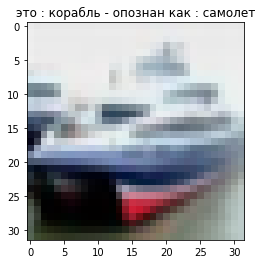

In [69]:
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

**Выводы:**  

- С увеличением количества каналов, наблюдаем падение метрики и увеличение потерь  
- С увеличением количества слоев наблюдаем еще большее падение метрики и увеличение потерь  
- Полносвязная сеть показывает качество вообще плохое, хуже чем у базовой модели со сверточными слоями  